COMBINED SENTIMENT SCORES GRAPH

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
df=pd.read_csv("datasets/combined/privateorg_combined.csv")

In [5]:
import csv  # Import csv module for quoting options
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):  # Ensure input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return None  # Return None for non-text values

# Read the CSV file with proper quoting to handle commas inside strings
input_csv = 'datasets/combined/privateorg_combined.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv, quotechar='"')  # Ensure proper reading of quoted text

# Apply the sentiment analysis to each line in the 'post_body_text' column
df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

# Verify the contents of the DataFrame
print(df.head())

# Write the results to a new CSV file with proper quoting for text fields
output_csv = 'datasets/combined/privateorg_combined_output.csv'  # Replace with your desired output CSV file path
df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)  # Correct quoting usage

# Confirm the file was written
print(f"Output file saved to: {output_csv}")

      PostId                                            PostUrl  \
0   75155468  https://twitter.com/onlineathens/status/158853...   
1  409731415        https://www.instagram.com/reel/DEr3BDNxxEB/   
2  375172034  https://www.facebook.com/SpartanburgCountyGove...   
3  237066221  https://www.facebook.com/100064380325443/posts...   
4  229503249  https://twitter.com/Univision23/status/1787575...   

   PostEngagement         Platform  ChannelID                 ChannelName  \
0             NaN          Twitter    8100840        Athens Banner-Herald   
1             NaN  InstagramDirect   29017393  V-103 The People's Station   
2             NaN         Facebook   29683837          Spartanburg County   
3             NaN         Facebook   23821126             Univision Miami   
4             NaN          Twitter   10183886          Univision 23 Miami   

      ChannelUid     ChannelUrl  \
0  blank_for_now  blank_for_now   
1  blank_for_now  blank_for_now   
2  blank_for_now  blank_for_n

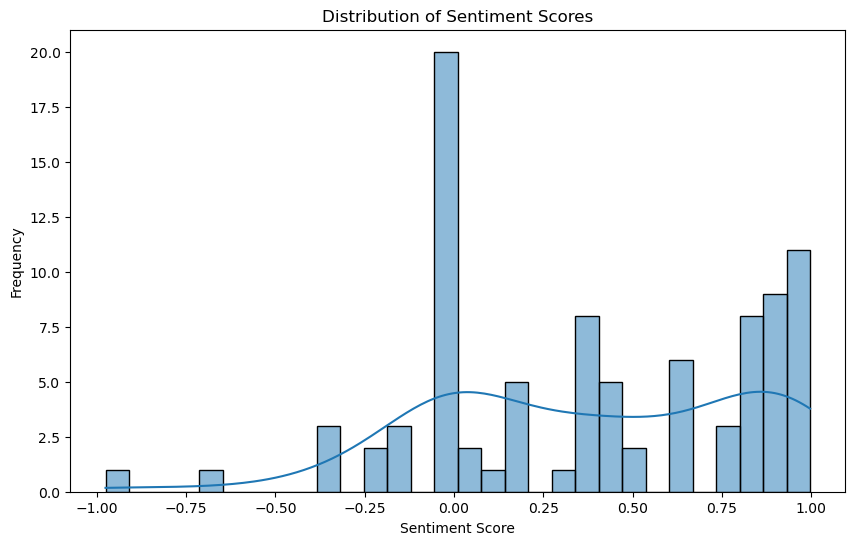

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/combined/privateorg_combined_output.csv')

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Average overall sentiment score
average_sentiment = df['sentiment'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

Average Sentiment Score: 0.3895263736263736


In [8]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('datasets/combined/privateorg_combined_output.csv')

# Group by 'Platform' and calculate the average sentiment score for each platform
average_sentiment = df.groupby('Platform')['sentiment'].mean().reset_index()

# Rename columns for clarity
average_sentiment.columns = ['Platform', 'AverageSentimentScore']

print(average_sentiment)

          Platform  AverageSentimentScore
0         Facebook               0.303522
1        Instagram               0.718420
2  InstagramDirect               0.905637
3           TikTok               0.670222
4          Twitter               0.221530
5          YouTube               0.278267
